In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# create feature set and target set
x=df.iloc[:, 3:13]
y=df.iloc[:, 13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [5]:
# categorical encoding
geography=pd.get_dummies(x["Geography"], drop_first=True,dtype=int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [6]:
gender=pd.get_dummies(x["Gender"], drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [7]:
##concatenate the data frame
x=pd.concat([x,geography,gender], axis=1)
## Drop unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
#splitting the datasetr into the training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#feature scaling to reduce the time for calculation of 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [10]:
#importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#intialising the ANN
classifier= Sequential()

In [12]:
#adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', activation='relu',input_dim=11))

In [13]:
#adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', activation='relu'))
#adding the  output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [14]:
#
classifier.compile(optimizer='Adamax',loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
#
model_history= classifier.fit(x_train, y_train, validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 2s 2ms/step - loss: 0.7305 - accuracy: 0.6128 - val_loss: 0.5971 - val_accuracy: 0.7255
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7709 - val_loss: 0.5311 - val_accuracy: 0.7887
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7962 - val_loss: 0.5082 - val_accuracy: 0.7929
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4920 - accuracy: 0.7975 - val_loss: 0.4941 - val_accuracy: 0.7952
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4786 - accuracy: 0.7987 - val_loss: 0.4836 - val_accuracy: 0.7952
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4678 - accuracy: 0.8009 - val_loss: 0.4740 - val_accuracy: 0.7959
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4577 - accuracy: 0.8035 - val_loss: 0.4658 - val_accuracy: 0.8016
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


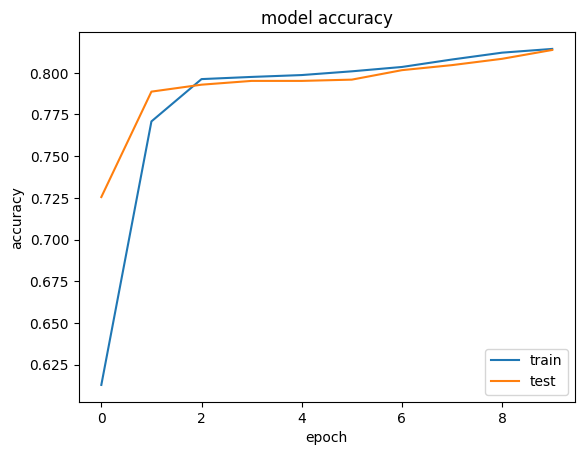

In [16]:
#list all dat in history
print(model_history.history.keys())
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'], loc='lower right')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


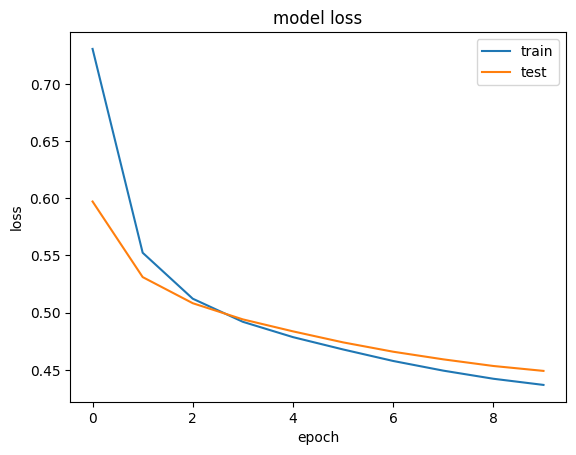

In [17]:
#
print(model_history.history.keys())
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'], loc='upper right')

In [18]:
#part3- making the predictio

y_pred= classifier.predict(x_test)
y_pred= (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [19]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1560,   47],
       [ 312,   81]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8205